In [76]:
import numpy as np
import numpy.polynomial.polynomial as npoly
from scipy import optimize
import matplotlib.pyplot as plt
np.random.seed(2017)
import pandas as pd


df=pd.read_csv("cost_inn_obj.csv",names=["t", "inn1", "inn2", "inn3", "inn4", "inn5"],header=0)

In [77]:
df

,t,inn1,inn2,inn3,inn4,inn5
0,0.0,1.993040,2.987696,4.038422,1.978295,3.997615
1,2.5,1.563452,3.093349,3.641949,1.929984,3.997856
2,5.0,1.331523,3.167322,3.324632,1.910463,3.995217
3,7.5,1.194761,3.230098,3.074801,1.930712,3.997833
4,10.0,1.107306,3.289068,2.877956,1.985308,4.009773
5,12.5,1.050496,3.349183,2.725129,2.067093,4.033773
6,15.0,1.015915,3.413933,2.610807,2.170811,4.072015
7,17.5,0.999257,3.485878,2.531292,2.293362,4.126379
8,20.0,0.998003,3.566985,2.483864,2.433280,4.198553
9,22.5,1.010505,3.658863,2.466404,2.590190,4.290108


In [78]:
inn_reg=pd.DataFrame(columns=["Inn","C0R1","C1R1","C0R2","C1R2","C0R3","C1R3","C0R4","C1R4","C0R5","C1R5"])
inn_xrang=pd.DataFrame(columns=["Inn","R1","R2","R3","R4","R5"])

y = 1.9930401843780337 - 0.1718352752538171·x¹, if x in [0.0, 2.5]
y = 1.547521772272314 - 0.044843385231611·x¹, if x in [5.0, 10.0]
y = 1.0833607322775776 - 0.003915740684572423·x¹, if x in [12.5, 22.5]
y = 0.42842907107935185 + 0.023558936739643918·x¹, if x in [25.0, 37.5]
y = -0.5150325403654252 + 0.04810806008056309·x¹, if x in [40.0, 50.0]


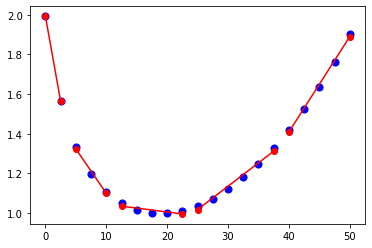

In [79]:
#inn1
inn=1
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn1)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)

plt.scatter(x, y, c='blue', s=50)
count=1
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"Inn"]=inn
plt.show()



y = 2.9876957501999426 + 0.04226122920496585·x¹, if x in [0.0, 2.5]
y = 3.029742541698317 + 0.026220221477584498·x¹, if x in [5.0, 20.0]
y = 2.5907469121880213 + 0.047161215823293315·x¹, if x in [22.5, 30.0]
y = 1.748337854751615 + 0.07393723364421424·x¹, if x in [32.5, 40.0]
y = 0.23132542666407135 + 0.11053410897993808·x¹, if x in [42.5, 50.0]


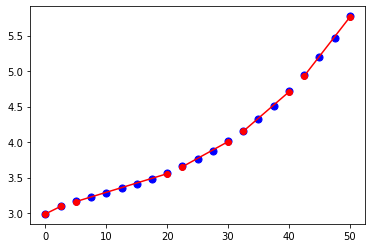

In [80]:
inn=2
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn2)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"Inn"]=inn
plt.show()



y = 4.025229643812849 - 0.14275802437604249·x¹, if x in [0.0, 5.0]
y = 3.517337151726209 - 0.06179235267677469·x¹, if x in [7.5, 15.0]
y = 2.6424294132417097 - 0.0071875650255768106·x¹, if x in [17.5, 25.0]
y = 1.378084158193751 + 0.040435641813295495·x¹, if x in [27.5, 37.5]
y = -0.5821529101042664 + 0.09094440977515444·x¹, if x in [40.0, 50.0]


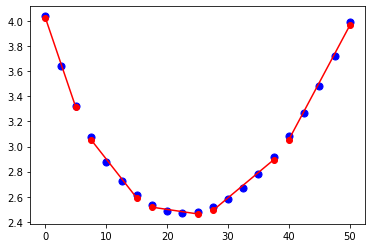

In [81]:
inn=3
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn3)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"Inn"]=inn
plt.show()




y = 1.9617037415862046 - 0.0064907345233427595·x¹, if x in [0.0, 7.5]
y = 1.5638100468456124 + 0.04111514783633807·x¹, if x in [10.0, 17.5]
y = 0.9461495183231027 + 0.07345668091216534·x¹, if x in [20.0, 30.0]
y = -0.22856220205907327 + 0.11127848291272908·x¹, if x in [32.5, 40.0]
y = -2.139248193906743 + 0.1573722414360755·x¹, if x in [42.5, 50.0]


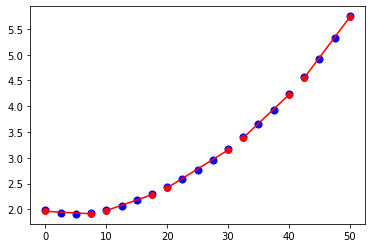

In [82]:
inn=4
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn4)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"Inn"]=inn

plt.show()



y = 3.989690682108475 + 0.0025045858987275396·x¹, if x in [0.0, 12.5]
y = 3.6269236886412832 + 0.029058118318152526·x¹, if x in [15.0, 22.5]
y = 2.7980220997322736 + 0.06369020188495801·x¹, if x in [25.0, 32.5]
y = 1.2679865940166495 + 0.1087986967614559·x¹, if x in [35.0, 42.5]
y = -0.9204359661884727 + 0.1591432874413955·x¹, if x in [45.0, 50.0]


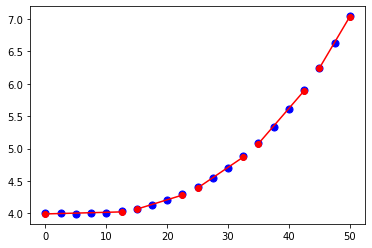

In [83]:
inn=5
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
    return fcache[breakpoints]

def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

x = np.array(df.t)
y = np.array(df.inn5)

num_breakpoints = 4
breakpoints = optimize.brute(
    f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
count=1
plt.scatter(x, y, c='blue', s=50)
for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
    inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
    inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
    count=count+1
    plt.plot(x_interval, f(x_interval), 'ro-')

inn_reg.loc[inn,"Inn"]=inn
inn_xrang.loc[inn,"Inn"]=inn
plt.show()



https://stackoverflow.com/questions/46218934/piecewise-linear-fit-with-n-breakpoints

In [84]:
inn_reg

,Inn,C0R1,C1R1,C0R2,C1R2,C0R3,C1R3,C0R4,C1R4,C0R5,C1R5
1,1,1.993,-0.172,1.548,-0.045,1.083,-0.004,0.428,0.024,-0.515,0.048
2,2,2.988,0.042,3.03,0.026,2.591,0.047,1.748,0.074,0.231,0.111
3,3,4.025,-0.143,3.517,-0.062,2.642,-0.007,1.378,0.04,-0.582,0.091
4,4,1.962,-0.006,1.564,0.041,0.946,0.073,-0.229,0.111,-2.139,0.157
5,5,3.99,0.003,3.627,0.029,2.798,0.064,1.268,0.109,-0.92,0.159


In [85]:
inn_xrang

,Inn,R1,R2,R3,R4,R5
1,1,2.5,10.0,22.5,37.5,50.0
2,2,2.5,20.0,30.0,40.0,50.0
3,3,5.0,15.0,25.0,37.5,50.0
4,4,7.5,17.5,30.0,40.0,50.0
5,5,12.5,22.5,32.5,42.5,50.0


In [86]:
inn_reg.to_csv("./inn_reg.csv")
inn_xrang.to_csv("./inn_xrang.csv")